In [507]:
from collections import OrderedDict

import pandas as pd
import numpy as np
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [508]:
df_orig = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [509]:
df_orig.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [510]:
def prep_df(df):
    df['bmi'] = normalize(df['bmi'].values.reshape(-1, 1))
    df['age'] = normalize(df['age'].values.reshape(-1, 1))
    df['charges'] = np.log1p(df['charges'])
    df['children'] = np.where(
        df['children'].astype(np.int) > 4,
            'more than 4', df['children'])
    return df

In [511]:
df = df_orig.pipe(prep_df)

In [512]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1.0,female,1.0,0,yes,southwest,9.734236
1,1.0,male,1.0,1,no,southeast,7.453882
2,1.0,male,1.0,3,no,southeast,8.400763
3,1.0,male,1.0,0,no,northwest,9.998137
4,1.0,male,1.0,0,no,northwest,8.260455


In [513]:
def to_dummies(df):
    if isinstance(df, pd.Series):
        df = pd.DataFrame(df)
    cat_columns = list(df.select_dtypes('object').columns)
    return pd.get_dummies(df, columns=cat_columns, sparse=True, drop_first=True)

In [514]:
def get_Xy(df, y_col):
    X = df[[i for i in df.columns if i != y_col]]
    y = df[y_col]
    return X, y

In [515]:
def prep_Xy(df, y_col):
    X, y = get_Xy(df, y_col)
    X = to_dummies(X)
    return X, y

In [516]:
y_col = 'charges'

In [517]:
X, y = prep_Xy(df, y_col)

In [518]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [519]:
model = xgb.XGBRegressor(n_jobs=4,
                         n_estimators=5000,
                         learning_rate=0.5,
                         seed=112,
                        )

In [520]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=112,
       silent=True, subsample=1)

In [533]:
class FeatureImportance(object):
    
    def __init__(self, model):
        self.model = model
        self.feature_importance = pd.DataFrame()
        self._feature_importance()
        
    def _feature_importance(self):
        feature_importances = model.get_booster().get_fscore().items()
        feature_importances = pd.DataFrame(
            list(feature_importances),
            columns=['feature', 'importance']
        ).sort_values('importance', ascending=False)
        self.feature_importance = feature_importances
        
    def plot(self):
        a4_dims = (11.7, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        sns.barplot(x="importance", y="feature", palette='magma', data=self.feature_importance, estimator=sum)

In [534]:
feature_importances = FeatureImportance(model)

In [535]:
feature_importances.feature_importance.head(5)

,feature,importance
0,smoker_yes,185
6,sex_male,142
5,region_southeast,100
8,region_northwest,98
7,region_southwest,88


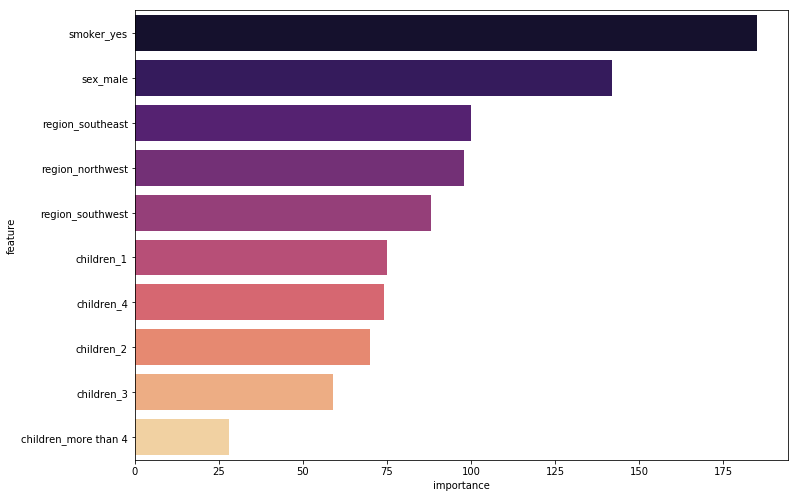

In [536]:
feature_importances.plot()

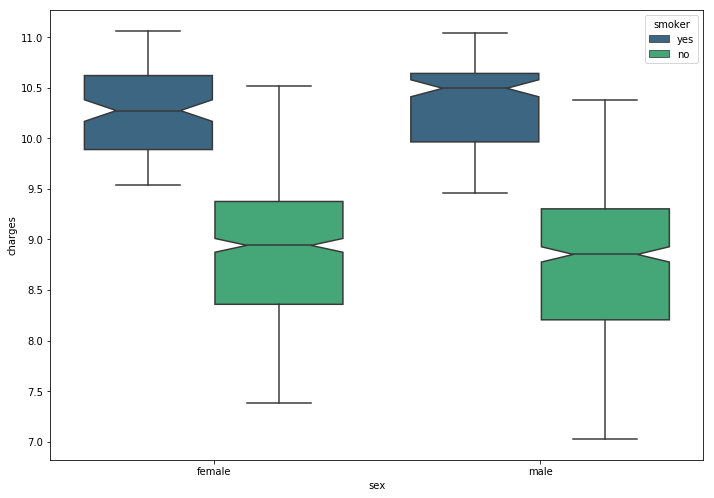

In [537]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x="sex", y="charges", hue="smoker",
            data=df, palette="viridis", ax=ax, notch=True)

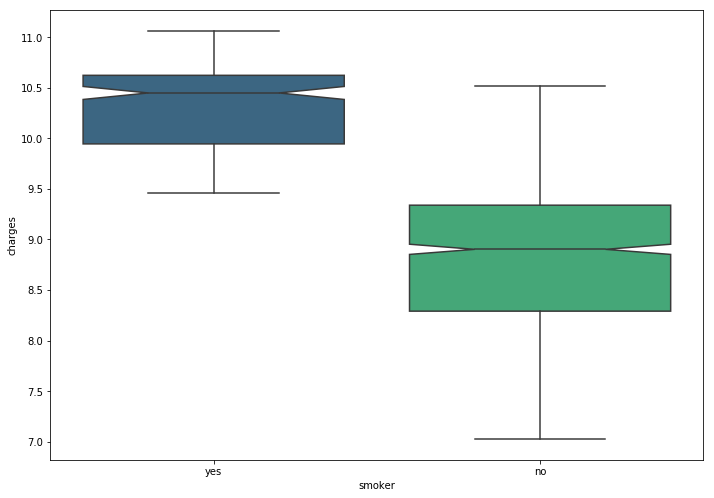

In [538]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x="smoker", y="charges",
            data=df, palette="viridis", ax=ax, notch=True)